In [1]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.preprocessing.image import array_to_img
import warnings
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import cv2
import tensorflow as tf 
from PIL import Image 
from numpy import asarray
from tqdm import tqdm
import argparse
from __future__ import print_function
from builtins import input



In [ ]:
DATADIR = r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\Arabic Handwritten Characters Dataset"
#np.set_printoptions(threshold=sys.maxsize)

# using opencv library's imread
cv2image = cv2.imread(DATADIR+ r"\Train Images 13440x32x32\train\id_1_label_1.png", cv2.IMREAD_GRAYSCALE)
print(cv2image)
cv2image.shape
cv2.imshow('cv2image', cv2image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2image.shape

In [ ]:
# using asarray from numpy
img2 = Image.open(DATADIR+ r"\Train Images 13440x32x32\train\id_1_label_1.png")

asarrayimage = asarray(img2)
print(asarrayimage)

plt.imshow(asarrayimage)
cv2.imshow('asarray', asarrayimage)
cv2.waitKey(0)
cv2.destroyAllWindows()
asarrayimage.shape
asarrayimage.dtype

In [ ]:
# using keras image _to_array
imgK = load_img(DATADIR+ r"\Train Images 13440x32x32\train\id_1_label_1.png")
imgKdata = img_to_array(imgK)
print(imgKdata)
plt.imshow(imgKdata)
imgKdata.shape

In [ ]:
# now we try to get the image from the csv file

csvarray = pd.read_csv(DATADIR + r"\csvTrainImages 13440x1024.csv", nrows = 1, header= None)

csvarray.shape
csvarray= csvarray.iloc[:,:].values.astype('uint8')
csvarray.shape
csvarray = csvarray.reshape([32, 32, 1])
csvarray.shape

print(csvarray)


In [ ]:
kerasimgfromcsv = array_to_img(csvarray)
plt.imshow(kerasimgfromcsv)
cv2.imshow('example', csvarray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# no dice, still dont know how they did it...
# let's just convert the pictures our own way...

path = DATADIR+ r"\Train Images 13440x32x32\train"

#returns a list containing all the directories in path (names of the images)
imgFileNameList = os.listdir(path)


print(imgFileNameList[0])
imageIdTest = imgFileNameList[0].split('_')[1]
print(imageIdTest)

#it work! so now we use this label as our sorting criteria
def getImgId(imgName):
    return int(imgName.split('_')[1])

imgFileNameList.sort(key=getImgId)
print(imgFileNameList)

In [ ]:
img_array = cv2.imread(os.path.join(path,imgFileNameList[0]) ,cv2.IMREAD_GRAYSCALE)
cv2.imshow('test',img_array)
cv2.waitKey(0)
cv2.destroyAllWindows()
img_array.shape
img_array.reshape([32,32,1])

# it works!

In [ ]:
#now we make our new train_data
train_data = []

for img in tqdm(imgFileNameList):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                train_data.append([img_array])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass


In [ ]:
#let's have a look at the shape of our array
train_data = np.asarray(train_data)
print(train_data.shape)
train_data = train_data.reshape([-1, 32, 32, 1])
print(train_data.shape)
np.set_printoptions(threshold=1000)
print(train_data)
#looks the same as train_data from our model!

In [2]:
#Let's put allwe need in one cell and test!
DATADIR = r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\Arabic Handwritten Characters Dataset"
train_data = []
test_data = []
trainPath = DATADIR + r"\Train Images 13440x32x32\train"
testPath  = DATADIR + r"\Test Images 3360x32x32\test"

def getImgId(imgName):
    return int(imgName.split('_')[1])

def makeData(data, directory, sortingCriteria):
    imgFileNameList = os.listdir(directory)     #get list of directories in path (ie. list of image names)
    imgFileNameList.sort(key = sortingCriteria) #sort list based on key
    
    for img in tqdm(imgFileNameList):  # iterate over the sorted list
                try:
                    img_array = cv2.imread(os.path.join(directory, img) ,cv2.IMREAD_GRAYSCALE)  # convert image to array
                    data.append([img_array])  # add this to our data
                except Exception as e:  # just in case there is a mistake.
                    pass

makeData(train_data, trainPath, getImgId)
makeData(test_data, testPath, getImgId)

# convert to ndarray and reshape
train_data = np.asarray(train_data).reshape([-1, 32, 32, 1])
test_data = np.asarray(test_data).reshape([-1, 32, 32, 1])
print(train_data.shape)
print(train_data)

100%|████████████████████████████████████████████████████████████████████████████| 3360/3360 [00:00<00:00, 4798.96it/s]

(13440, 32, 32, 1)
(13440, 32, 32, 1)
[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   

In [8]:
print(test_data.shape)
print(train_data[0].shape)
print(train_data[0])

(3360, 32, 32, 1)
(32, 32, 1)
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [7]:
print(test_data)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [10]:
# more testing
cv2.imshow('test', train_data[0])
cv2.waitKey(0)
cv2.destroyAllWindows()
#it works!

162.0


In [13]:
# Now let's try to work with a sample to test

# Read image given by user
#parser = argparse.ArgumentParser(description='Code for Changing the contrast and brightness of an image! tutorial.')
#parser.add_argument('9alb-Ba2-0.png', help='C:\Users\rassa\Desktop\Desktop2.0\CNN', default='9alb-Ba2-0.png')
#args = parser.parse_args()
#r"C:\Users\rassa\Desktop\Desktop2.0\CNN\9alb-Ba2-0.png") #
image = cv2.imread(r"C:\Users\rassa\Desktop\Desktop2.0\CNN\9alb-Ba2-0.png") #(cv.samples.findFile(args.input))
#removethe three dimensions and turn image to gray scale
im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#binarize the image using Otsu method to get the threshold, binarize to black and white(ie. 255)
th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 255, cv2.THRESH_OTSU)

#print the threshold because I'm curious
print(th)
new_image = np.zeros(im_gray_th_otsu.shape, im_gray_th_otsu.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control
# Initialize values
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(im_gray_th_otsu.shape[0]):
    for x in range(im_gray_th_otsu.shape[1]):
        # the clip makes sure that the new values of the pixel are between 0 and 255
        new_image[y,x] = np.clip(alpha*im_gray_th_otsu[y,x] + beta, 0, 255)

#Show the images so we can compare them
cv2.imshow('New Image', new_image)
cv2.imshow('Original Image', image)
cv2.imshow('Binarized image', im_gray_th_otsu)
# Wait until user press some key
cv2.waitKey(0) 
cv2.destroyAllWindows()

162.0
 Basic Linear Transforms 
-------------------------
* Enter the alpha value [1.0-3.0]: 3.0
* Enter the beta value [0-100]: 0


In [32]:
# Now let's try enhacing the edges first

# Read image given by user
image = cv2.imread(r"C:\Users\rassa\Desktop\Desktop2.0\CNN\9alb-Ba2-0.png") #(cv.samples.findFile(args.input))
kernel0 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])


edge_enhance_img0 = cv2.filter2D(image, -1, kernel0)


contrast_img = np.zeros(edge_enhance_img0.shape, edge_enhance_img0.dtype)

alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

# Initialize values
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
    
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(edge_enhance_img0.shape[0]):
    for x in range(edge_enhance_img0.shape[1]):
        for c in range(edge_enhance_img0.shape[2]):
            # the clip makes sure that the new values of the pixel are between 0 and 255
            contrast_img[y,x,c] = np.clip(alpha*edge_enhance_img0[y,x,c] + beta, 0, 255)
        
#removethe three dimensions and turn image to gray scale
im_gray = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2GRAY)
#binarize the image using Otsu method to get the threshold, binarize to black and white(ie. 255)
th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 255, cv2.THRESH_TRIANGLE)

resized = cv2.resize(im_gray_th_otsu, (28,28), interpolation = cv2.INTER_AREA)
#print the threshold because I'm curious
print(th)

#Show the images so we can compare them
cv2.imshow('Original Image', image)
cv2.imshow('Edge Enhaced0 image', edge_enhance_img0)
cv2.imshow('Contrast image', contrast_img)
cv2.imshow('New Image', im_gray_th_otsu)
cv2.imshow('resized Image', resized)


# Wait until user press some key
cv2.waitKey(0) 
cv2.destroyAllWindows()



* Enter the alpha value [1.0-3.0]: 1.5
* Enter the beta value [0-100]: 0
253.0


In [15]:
# Now let's doing the contrast first

# Read image given by user
def preProcess(addr):
    
    image = cv2.imread(addr) #(cv.samples.findFile(args.input))
    
    contrast_img = np.zeros(image.shape, image.dtype)
    
    alpha = 1.0 # Simple contrast control
    beta = 0    # Simple brightness control
    
    # Initialize values
    try:
        alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
        beta = int(input('* Enter the beta value [0-100]: '))
    except ValueError:
        print('Error, not a number')
    
    # Do the operation new_image(i,j) = alpha*image(i,j) + beta
    # Instead of these 'for' loops we could have used simply:
    # new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
    # but we wanted to show you how to access the pixels :)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                # the clip makes sure that the new values of the pixel are between 0 and 255
                contrast_img[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
            
    #removethe three dimensions and turn image to gray scale
    im_gray = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2GRAY)
    #binarize the image using Otsu method to get the threshold, binarize to black and white(ie. 255)
    th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 255, cv2.THRESH_OTSU)
    
    if image.shape[0]>image.shape[1]*1.4:
        resized = cv2.resize(im_gray_th_otsu, (32,int(32*image.shape[0]/image.shape[1])), interpolation = cv2.INTER_AREA)
    elif image.shape[1]>image.shape[0]*1.4:
        resized = cv2.resize(im_gray_th_otsu, (int(32*image.shape[1]/image.shape[0]),32), interpolation = cv2.INTER_AREA)
    else:
        resized = cv2.resize(im_gray_th_otsu, (32,32), interpolation = cv2.INTER_AREA)
    
    #print the threshold because I'm curious
    print(th)
    return [image, contrast_img, im_gray, im_gray_th_otsu, resized]

def whiteToBlack(final_img, img ):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] < 125:     
                final_img[y,x] = 255
            else :
                final_img[y,x] = 0




In [16]:
Ba2LoImg = preProcess(r"D:\School\MedTech\Sophomore Pre-Eng\ISS296\CNN\images\9alb-Ba2-0.png")
kalbWordLoImg = preProcess(r"D:\School\MedTech\Sophomore Pre-Eng\ISS296\CNN\images\9alb.png")
sha3alWordLoImg  = preProcess(r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\ifnenit-database-demo\ifnenit-database-demo\data\set_a\bmp\ae07_050.bmp")

final_Ba2img = np.zeros(Ba2LoImg[4].shape, Ba2LoImg[4].dtype)
final_9albWordImg = np.zeros(kalbWordLoImg[4].shape, kalbWordLoImg[4].dtype)
final_sha3alWordImg = np.zeros(sha3alWordLoImg[4].shape, sha3alWordLoImg[4].dtype)

whiteToBlack(final_Ba2img, Ba2LoImg[4])
whiteToBlack(final_9albWordImg, kalbWordLoImg[4])



#Show the images so we can compare them
#cv2.imshow('New Image', im_gray_th_otsu)
#cv2.imshow('Original Image', image)
#cv2.imshow('Contrast image', contrast_img)
#cv2.imshow('resized Image', resized)
#cv2.imshow('final Image', final_img)
#plt.imshow(im_gray_th_otsu)

# Wait until user press some key
#cv2.waitKey(0) 
#cv2.destroyAllWindows()

#this one gives the best results!

* Enter the alpha value [1.0-3.0]: 1.25
* Enter the beta value [0-100]: 10
212.0
* Enter the alpha value [1.0-3.0]: 1.25
* Enter the beta value [0-100]: 10
205.0
* Enter the alpha value [1.0-3.0]: 1.0
* Enter the beta value [0-100]: 0
0.0


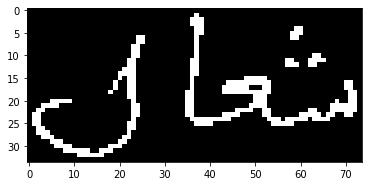

In [17]:
whiteToBlack(final_sha3alWordImg, sha3alWordLoImg[4])

def paddImg(img):
    paddedimg  = np.zeros((img.shape[0]+2, img.shape[1]+2), img.dtype)
    for y in range(1, paddedimg.shape[0]-1):
        for x in range(1, paddedimg.shape[1]-1):
                paddedimg[y,x] = img[y-1,x-1]
    return paddedimg

final_sha3alWordImg = paddImg(final_sha3alWordImg)
plt.imshow(final_sha3alWordImg, cmap='gray', vmin=0, vmax=255)

In [18]:
print(final_Ba2img)
final_Ba2img.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(32, 32)

In [19]:
final_Ba2img.reshape([32,32,1])
final_Ba2img.shape


(32, 32)

In [20]:
print(final_Ba2img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


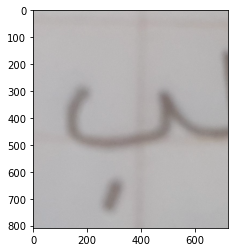

In [21]:
plt.imshow(Ba2LoImg[0])

(808, 722, 3)

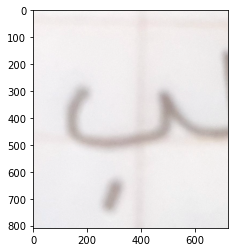

In [22]:
plt.imshow(Ba2LoImg[1])
Ba2LoImg[1].shape

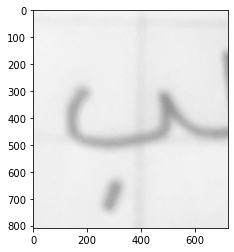

In [23]:
plt.imshow(Ba2LoImg[2], cmap='gray', vmin=0, vmax=255)

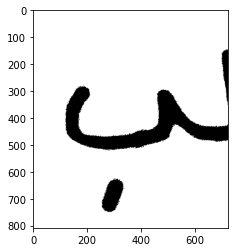

In [24]:
plt.imshow(Ba2LoImg[3], cmap='gray', vmin=0, vmax=255)

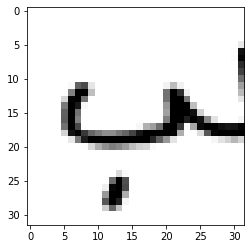

In [25]:
plt.imshow(Ba2LoImg[4], cmap='gray', vmin=0, vmax=255)

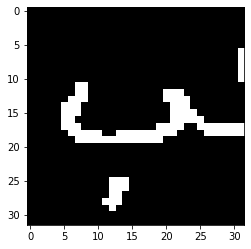

In [26]:
plt.imshow(final_Ba2img, cmap='gray', vmin=0, vmax=255)

In [27]:
#from tkinter import Tk     # from tkinter import Tk for Python 3.x
#from tkinter.filedialog import askopenfilename

#Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
#filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
#print(filename)

In [28]:
def blackToWhite(img, finalImg):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] == 0:     
                finalImg[y,x] = 255
            else :
                finalImg[y,x] = 0



dictionary = [3,6,7,12,24,28,14,224,225,216,143,15,30,48,52,96,112,54,240,227,131,135,99,56,60,120,62,129,192,248,251,195,141]

def skeletonize(img):
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==0:
                b = calculateB(img, r, c)
                #print(str([r,c]) + ": b = " + str(b) )
                if classifyB(b):
                    img[r,c] = 150
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==150:
                #print(True)
                img[r,c] = 255
    

def calculateB(img, r, c):
    numbers = [int(img[r-1,c]),int(img[r-1,c+1]),int(img[r,c+1]),int(img[r+1,c+1]),int(img[r+1,c]),int(img[r+1,c-1]),int(img[r,c-1]),int(img[r-1,c-1])]
    #numbers = [int(img[c,r+1]),int(img[c+1,r+1]),int(img[c+1,r]),int(img[c+1,r-1]),int(img[c,r-1]),int(img[c-1,r-1]),int(img[c-1,r]),int(img[c-1,r+1])]
    #print(numbers)
    b = 0
    for i in range(0,8):
        if numbers[i]<140:
            b+=2**i
    #print(b)
    return b

def classifyB(b):
    for i in dictionary:
        if int(b) == int(i):
            print(b)
            return True
    return False 


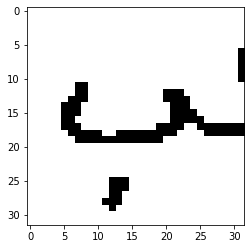

In [29]:
final_Ba2imgBtW = np.zeros(Ba2LoImg[4].shape, Ba2LoImg[4].dtype)


blackToWhite(final_Ba2img, final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

30
30
30
14
30
30
15
28
30
216
7
135
135
14
28
30
30
3
60
28
60
48
96
60
60
60
62
28
54
28
14
30
28
30
30
30
30
54
24
28
30
30
248
141
7
135
135
135
135


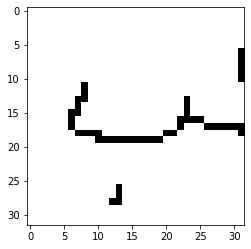

In [30]:
skeletonize(final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

6


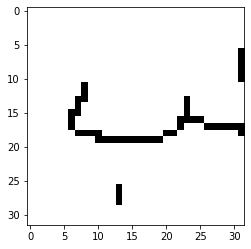

In [31]:
skeletonize(final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

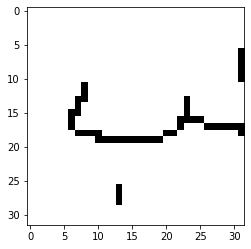

In [32]:
skeletonize(final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

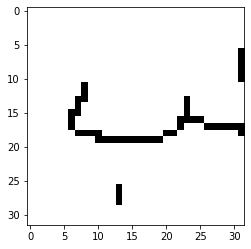

In [33]:
skeletonize(final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

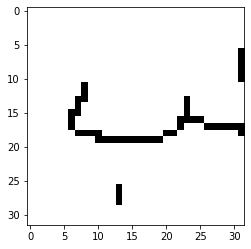

In [34]:
skeletonize(final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

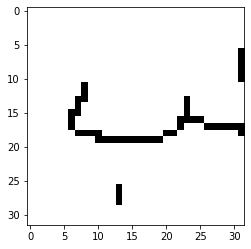

In [35]:
skeletonize(final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

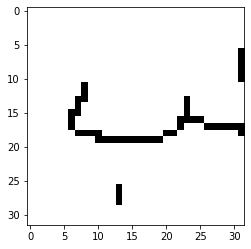

In [36]:
skeletonize(final_Ba2imgBtW)
plt.imshow(final_Ba2imgBtW, cmap='gray', vmin=0, vmax=255)

In [37]:
final_9albWordImg.shape
print(final_9albWordImg)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
final_9albWordImg.shape

(32, 50)

In [39]:
kalbWordLoImg[4].shape

(32, 50)

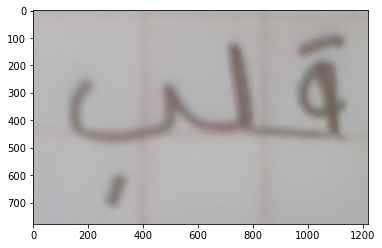

In [40]:
plt.imshow(kalbWordLoImg[0])

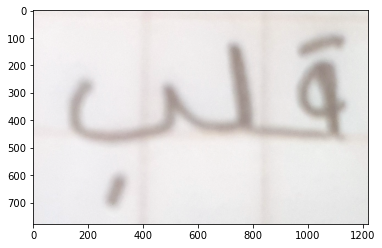

In [41]:
plt.imshow(kalbWordLoImg[1])

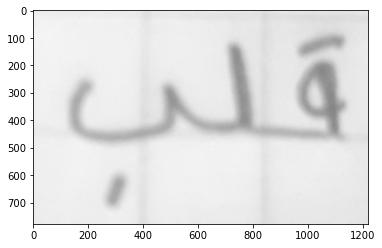

In [42]:
plt.imshow(kalbWordLoImg[2], cmap='gray', vmin=0, vmax=255)

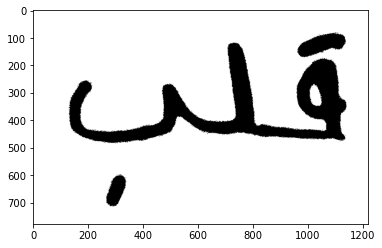

In [43]:
plt.imshow(kalbWordLoImg[3], cmap='gray', vmin=0, vmax=255)

In [44]:
kalbWordLoImg[3].shape

(778, 1221)

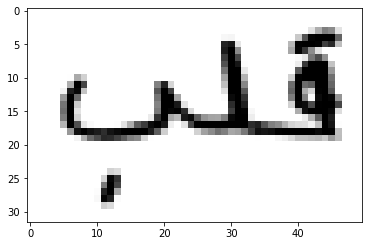

In [45]:
newdim9alb = cv2.resize(kalbWordLoImg[3], (int(32*1221/778),32), interpolation = cv2.INTER_AREA)
plt.imshow(newdim9alb, cmap='gray', vmin=0, vmax=255)

In [46]:
newdim9alb.shape

(32, 50)

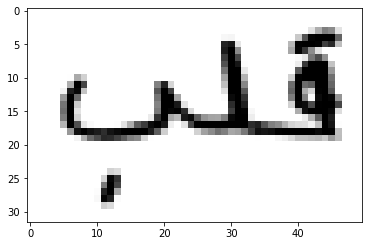

In [47]:
plt.imshow(kalbWordLoImg[4], cmap='gray', vmin=0, vmax=255)

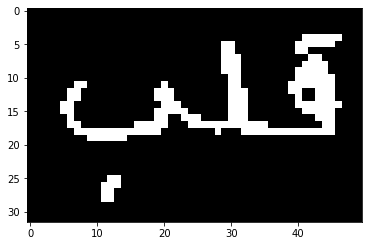

In [48]:
plt.imshow(final_9albWordImg, cmap='gray', vmin=0, vmax=255)

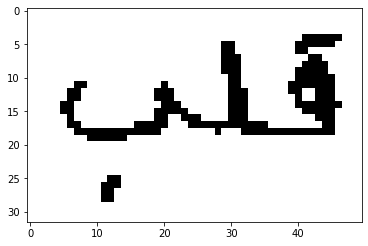

In [49]:
final_9albImgBtw = np.zeros(kalbWordLoImg[4].shape, kalbWordLoImg[4].dtype)
blackToWhite(final_9albWordImg, final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

In [50]:
final_9albImgBtw.shape

(32, 50)

30
14
30
216
96
135
135
135
30
30
6
135
28
135
48
96
131
60
60
62
30
14
30
30
54
24
28
30
30
248
141
7
131
28
30
30
30
14
240
240
240
240
248
112
240
240
240
248
135
135
135
30
14
30
6
30
30
28
30
30
62
135
60
143
60
120
15
60
112
248
52
112
240
240
248
96


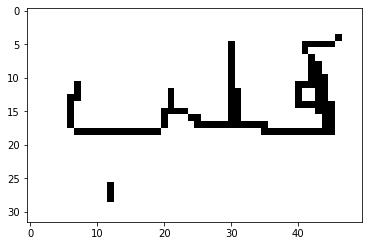

In [51]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

240
240
240
240
248
240
248
143
112
240
240
248
112
240
240
240
192


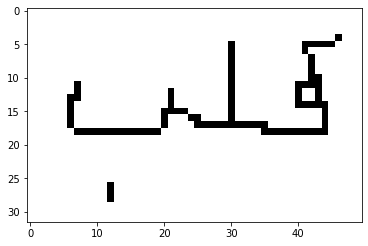

In [52]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

240


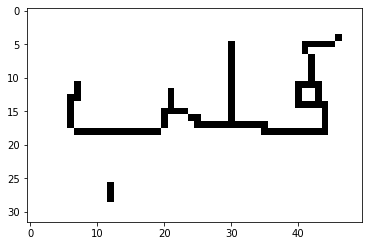

In [53]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

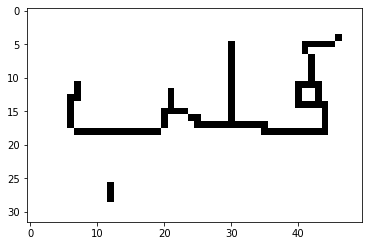

In [54]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

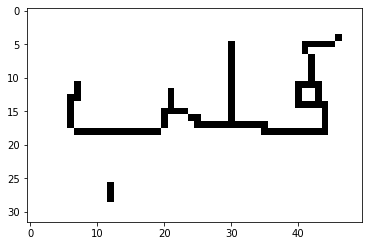

In [55]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

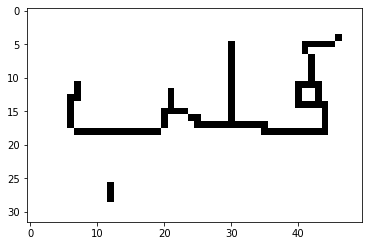

In [56]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

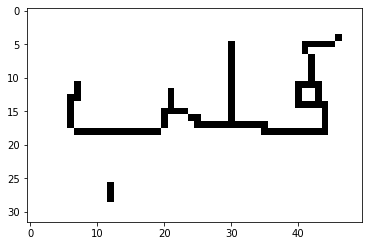

In [57]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

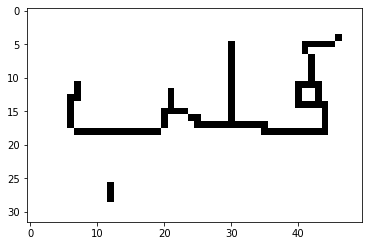

In [58]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

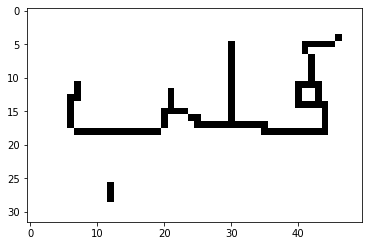

In [59]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

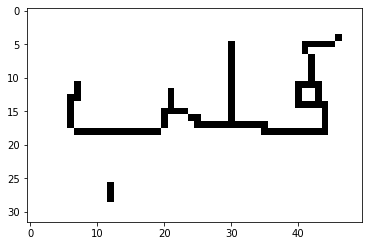

In [60]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

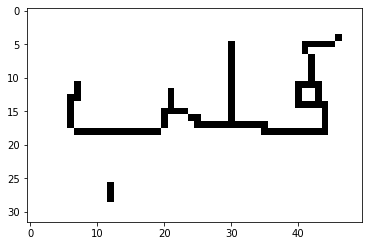

In [61]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

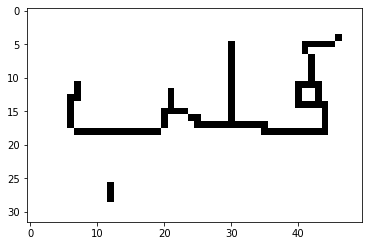

In [62]:
skeletonize(final_9albImgBtw)
plt.imshow(final_9albImgBtw, cmap='gray', vmin=0, vmax=255)

<Figure size 432x288 with 0 Axes>

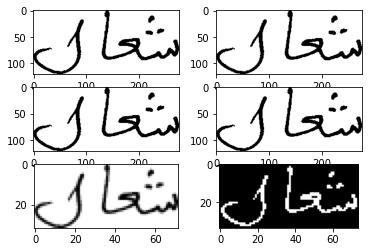

In [63]:
plt.figure()

fig, ax = plt.subplots(3,2)

sha3alWordImg0 = ax[0][0].imshow(sha3alWordLoImg[0])

sha3alWordImg1 = ax[0][1].imshow(sha3alWordLoImg[1])

sha3alWordImg2 = ax[1][0].imshow(sha3alWordLoImg[2], cmap='gray', vmin=0, vmax=255)

sha3alWordImg3 = ax[1][1].imshow(sha3alWordLoImg[3], cmap='gray', vmin=0, vmax=255)

sha3alWordImg4 = ax[2][0].imshow(sha3alWordLoImg[4], cmap='gray', vmin=0, vmax=255)

finalSha3alWordDisp = ax[2][1].imshow(final_sha3alWordImg, cmap='gray', vmin=0, vmax=255)

# whiteToBlack(final_sha3alWordImg, sha3alWordLoImg[4])

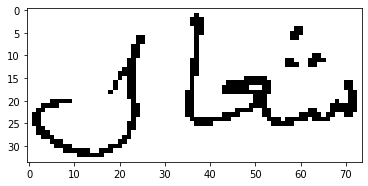

In [64]:
final_sha3alWordImgBtw = np.zeros(final_sha3alWordImg.shape, final_sha3alWordImg.dtype)
blackToWhite(final_sha3alWordImg, final_sha3alWordImgBtw)
plt.imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

30
30
14
15
52
216
7
141
60
52
135
141
7
135
135
52
52
54
62
30
30
62
15
30
30
30
28
240
240
224
48
96
30
30
30
30
30
14
30
14
30
30
30
24
28
30
30
135
135
135
131
30
6
60
28
30
6
52
28
30
6
28
30
6
52
30
30
6
28
60
54
60
60
56
15
112
240
224
135
28
6
60
30
6
24
52
28
3
48
60
54
30
6
28
28
3
56
135
56
54
30
24
60
60
28
14
62
135
131
240
240
240
240
192
15
141
15
15
143


<Figure size 432x288 with 0 Axes>

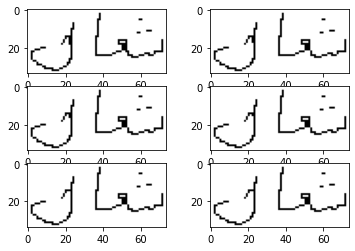

In [65]:
plt.figure()

fig, ax = plt.subplots(3,2)

skeletonize(final_sha3alWordImgBtw)
finalSha3alWordImgBtwSkel0 = ax[0][0].imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

skeletonize(final_sha3alWordImgBtw)
finalSha3alWordImgBtwSkel1 = ax[0][1].imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

skeletonize(final_sha3alWordImgBtw)
finalSha3alWordImgBtwSkel2 = ax[1][0].imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

skeletonize(final_sha3alWordImgBtw)
finalSha3alWordImgBtwSkel3 = ax[1][1].imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

skeletonize(final_sha3alWordImgBtw)
finalSha3alWordImgBtwSkel4 = ax[2][0].imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

skeletonize(final_sha3alWordImgBtw)
finalSha3alWordImgBtwSkel4 = ax[2][1].imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

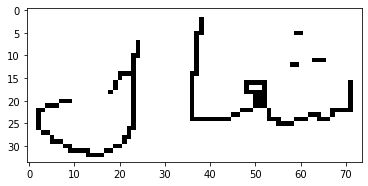

In [66]:
skeletonize(final_sha3alWordImgBtw)
plt.imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

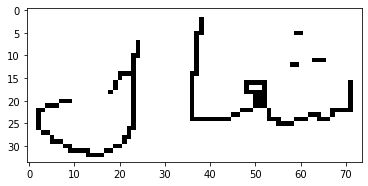

In [67]:
skeletonize(final_sha3alWordImgBtw)
plt.imshow(final_sha3alWordImgBtw, cmap='gray', vmin=0, vmax=255)

In [68]:
x = np.array([[ 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
              [ 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
              [ 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
              [ 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255],
              [ 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255]])
x.reshape([5,16,1])
print(x)


[[  0 255   0 255   0 255   0 255   0 255   0 255   0 255   0 255]
 [  0 255   0 255   0 255   0 255   0 255   0 255   0 255   0 255]
 [  0 255   0 255   0 255   0 255   0 255   0 255   0 255   0 255]
 [  0 255   0 255   0 255   0 255   0 255   0 255   0 255   0 255]
 [  0 255   0 255   0 255   0 255   0 255   0 255   0 255   0 255]]


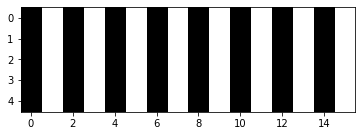

In [69]:
plt.imshow(x, cmap='gray', vmin=0, vmax=255) 

In [70]:
x[1,2]

0

In [71]:
#results are satisfactory on single word but still need tweaking on single character
#still need a way to decide how many iterations of skeletonizations are needed



dictionary = [3,6,7,12,24,28,14,224,225,216,143,15,30,48,52,96,112,54,240,227,131,135,99,56,60,120,62,129,192,248,251,195,141]

def normalize(img):
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==0:
                b = calculateB2(img, r, c)
                if int(img[r-1,c+1])==0 and int(img[r,c+1])==255:
                    print("b: " + str(b))
                    print("Go NE start at: " + str([r,c]))
                    trackAndSwitchNE(img, r, c)
                
                if int(img[r+1,c+1]) == 0 and int(img[r,c+1])==255:
                    print("b: " + str(b))
                    print("Go SE start at: " + str([r,c]))
                    trackAndSwitchSE(img, r, c)
                

    

def calculateB2(img, r, c):
    numbers = [int(img[r-1,c]),int(img[r-1,c+1]),int(img[r,c+1]),int(img[r+1,c+1]),int(img[r+1,c]),int(img[r+1,c-1]),int(img[r,c-1]),int(img[r-1,c-1])]
    #print(numbers)
    b = 0
    for i in range(0,8):
        if numbers[i]<160:
            b+=2**i
    #print(b)
    return b

def trackAndSwitchNE(img,r,c):
    row = r
    y = 0
    column = c
    x = 0
    addresses = []
    while True:
        
        if int(img[row-1,column+1]) == 0 and int(img[row,column+1]) == 255:
            if int(img[row-1,column]) == 0:
                print("break")
                break
            row+=-1
            y+=1
            column+=1
            x+=1
            addresses.append([row,column])
        elif int(img[row,column+1]) == 0:
            if int(img[row-1,column]) == 0:
                print("break")
                break
            column+=1
            x+=1
            addresses.append([row,column])
        else: 
            break
    print("addresses: " + str(addresses))
    print("x: " + str(x))
    print("y: " + str(y))
    for index in addresses:
        img[index[0],index[1]]=255
    
    for increment in range(0,y):
        img[r-increment,c]=0
        print("row build: " + str([r-increment,c]))
    
    
    for increment2 in range(0,x+1):
        #print("success")
        img[r-y, c+increment2]=0
        print("column build: " + str([r-y, c+increment2]))
        
def trackAndSwitchSE(img,r,c):
    row = r
    y = 0
    column = c
    x = 0
    addresses = []
    while True:
        
        if int(img[row+1,column+1]) == 0 and int(img[row,column+1]) == 255:
            #if int(img[row-1,column]) == 0:
                #break
            row+=1
            y+=1
            column+=1
            x+=1
            addresses.append([row,column])
        elif int(img[row,column+1]) == 0:
            if int(img[row-1,column+1]) == 0:
                print("break")
                break
            column+=1
            x+=1
            addresses.append([row,column])
        else: 
            break
    print("addresses: " + str(addresses))
    print("x: " + str(x))
    print("y: " + str(y))
    for index in addresses:
        img[index[0],index[1]]=255
    
    for increment in range(0,y):
        img[r+increment,c]=0
        print("row build: " + str([r+increment,c]))
    
    
    for increment2 in range(0,x+1):
        #print("success")
        img[r+y, c+increment2]=0
        print("column build: " + str([r+y, c+increment2]))


def getBaseline(img):
    baselineDensity = 0
    baselineRow = 0
    for r in range(0, img.shape[0]):
        currentSum = 0
        for c in range(0, img.shape[1]):
            if img[r,c]==0:
                currentSum+=1
        if currentSum>baselineDensity:
            baselineDensity = currentSum
            baselineRow = r

    return baselineRow


        

In [72]:
y_value_list = []
x_value_list = []

for i in range(0,20):
    i = int(i*2.5)
    x_value_list.append(i)

for i in range(0,14):
    i = int(i*2.5)
    y_value_list.append(i)
    
print(x_value_list)
print(y_value_list)

[0, 2, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37, 40, 42, 45, 47]
[0, 2, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32]


baseline row: 18


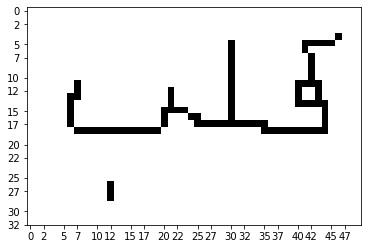

In [179]:
def makeTestImg(img, finalImg):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):     
                finalImg[y,x] = img[y,x]

test_img2 = np.zeros(final_9albWordImg.shape, final_9albWordImg.dtype)
test_img3 = np.zeros(final_sha3alWordImg.shape, final_sha3alWordImg.dtype)


makeTestImg(final_9albImgBtw, test_img2)
makeTestImg(final_sha3alWordImgBtw, test_img3)
#plt.imshow(test_img2, cmap='gray', vmin=0, vmax=255)

fig, ax = plt.subplots(1,1)

img5 = ax.imshow(test_img2, cmap='gray', vmin=0, vmax=255)



#x_label_list = ['A2', 'B2', 'C2', 'D2']

ax.set_xticks(x_value_list)
ax.set_yticks(y_value_list)

#ax.set_xticklabels(x_label_list)

#fig.imshow(img5)
print("baseline row: " + str(getBaseline(test_img2)))

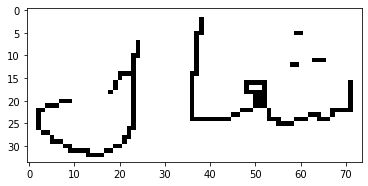

In [74]:
plt.imshow(test_img3, cmap='gray', vmin=0, vmax=255)

b: 19
Go NE start at: [23, 2]
break
addresses: []
x: 0
y: 0
column build: [23, 2]
b: 9
Go SE start at: [26, 2]
addresses: [[27, 3], [27, 4], [28, 5], [29, 6], [29, 7], [30, 8], [30, 9], [31, 10], [31, 11], [31, 12], [31, 13], [32, 14], [32, 15], [32, 16]]
x: 14
y: 6
row build: [26, 2]
row build: [27, 2]
row build: [28, 2]
row build: [29, 2]
row build: [30, 2]
row build: [31, 2]
column build: [32, 2]
column build: [32, 3]
column build: [32, 4]
column build: [32, 5]
column build: [32, 6]
column build: [32, 7]
column build: [32, 8]
column build: [32, 9]
column build: [32, 10]
column build: [32, 11]
column build: [32, 12]
column build: [32, 13]
column build: [32, 14]
column build: [32, 15]
column build: [32, 16]
b: 25
Go SE start at: [31, 2]
break
addresses: [[32, 3], [32, 4], [32, 5], [32, 6], [32, 7], [32, 8]]
x: 6
y: 1
row build: [31, 2]
column build: [32, 2]
column build: [32, 3]
column build: [32, 4]
column build: [32, 5]
column build: [32, 6]
column build: [32, 7]
column build: [32, 

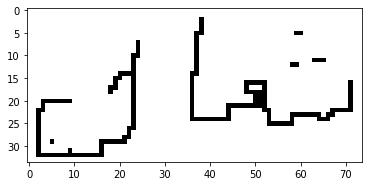

In [75]:
normalize(test_img3)

fig, ax = plt.subplots(1,1)

img6 = ax.imshow(test_img3, cmap='gray', vmin=0, vmax=255)

#x_label_list = ['A2', 'B2', 'C2', 'D2']

#ax.set_xticks(x_value_list)
#ax.set_yticks(y_value_list)
#plt.imshow(test_img2, cmap='gray', vmin=0, vmax=255) 
print("baseline row: " + str(getBaseline(test_img3)))

baseline row: 18


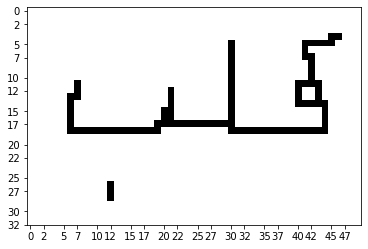

In [180]:
normalize(test_img2)

fig, ax = plt.subplots(1,1)

img5 = ax.imshow(test_img2, cmap='gray', vmin=0, vmax=255)

#x_label_list = ['A2', 'B2', 'C2', 'D2']

ax.set_xticks(x_value_list)
ax.set_yticks(y_value_list)
#plt.imshow(test_img2, cmap='gray', vmin=0, vmax=255) 
print("baseline row: " + str(getBaseline(test_img2)))

56
3
52
54
141
54
baseline row: 32


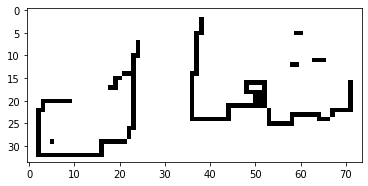

In [77]:
skeletonize(test_img3)
fig, ax = plt.subplots(1,1)

img5 = ax.imshow(test_img3, cmap='gray', vmin=0, vmax=255)

print("baseline row: " + str(getBaseline(test_img2)))

baseline row: 18


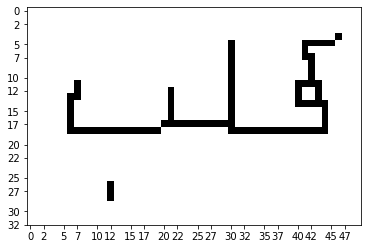

In [181]:

skeletonize(test_img2)
fig, ax = plt.subplots(1,1)

img5 = ax.imshow(test_img2, cmap='gray', vmin=0, vmax=255)

#x_label_list = ['A2', 'B2', 'C2', 'D2']

ax.set_xticks(x_value_list)
ax.set_yticks(y_value_list)
#plt.imshow(test_img2, cmap='gray', vmin=0, vmax=255)
print("baseline row: " + str(getBaseline(test_img2)))

baseline row: 18


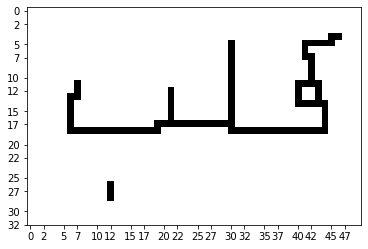

In [184]:
normalize(test_img2)
fig, ax = plt.subplots(1,1)

img5 = ax.imshow(test_img2, cmap='gray', vmin=0, vmax=255)

#x_label_list = ['A2', 'B2', 'C2', 'D2']

ax.set_xticks(x_value_list)
ax.set_yticks(y_value_list)
#plt.imshow(test_img2, cmap='gray', vmin=0, vmax=255)
print("baseline row: " + str(getBaseline(test_img2)))

b: 19
Go NE start at: [23, 2]
break
addresses: []
x: 0
y: 0
column build: [23, 2]
b: 25
Go SE start at: [31, 2]
break
addresses: [[32, 3], [32, 4], [32, 5], [32, 6], [32, 7], [32, 8], [32, 9], [32, 10], [32, 11], [32, 12], [32, 13], [32, 14], [32, 15]]
x: 13
y: 1
row build: [31, 2]
column build: [32, 2]
column build: [32, 3]
column build: [32, 4]
column build: [32, 5]
column build: [32, 6]
column build: [32, 7]
column build: [32, 8]
column build: [32, 9]
column build: [32, 10]
column build: [32, 11]
column build: [32, 12]
column build: [32, 13]
column build: [32, 14]
column build: [32, 15]
b: 51
Go NE start at: [21, 3]
break
addresses: []
x: 0
y: 0
column build: [21, 3]
b: 19
Go NE start at: [30, 16]
break
addresses: []
x: 0
y: 0
column build: [30, 16]
b: 51
Go NE start at: [16, 19]
break
addresses: []
x: 0
y: 0
column build: [16, 19]
b: 98
Go NE start at: [15, 20]
addresses: [[14, 21], [14, 22], [14, 23]]
x: 3
y: 1
row build: [15, 20]
column build: [14, 20]
column build: [14, 21]
colu

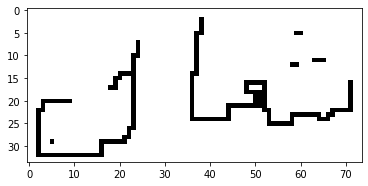

In [80]:
normalize(test_img3)
fig, ax = plt.subplots(1,1)

img5 = ax.imshow(test_img3, cmap='gray', vmin=0, vmax=255)

print("baseline row: " + str(getBaseline(test_img2)))

In [81]:
print("baseline row: " + str(getBaseline(test_img2)))

baseline row: 32


# Lets redo the whole thing using the new pre-processing techniques

In [278]:
#pre-processing functions skelotanize and normalize

def blackToWhite(img, finalImg):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] == 0:     
                finalImg[y,x] = 255
            else :
                finalImg[y,x] = 0
def whiteToBlack(final_img, img ):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] < 125:     
                final_img[y,x] = 255
            else :
                final_img[y,x] = 0


dictionary = [3,6,7,12,24,28,14,224,225,216,143,15,30,48,52,96,112,54,240,227,131,135,99,56,60,120,62,129,192,248,251,195,141]

def skeletonize(img):
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==0:
                b = calculateB(img, r, c)
                #print(str([r,c]) + ": b = " + str(b) )
                if classifyB(b):
                    img[r,c] = 150
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==150:
                #print(True)
                img[r,c] = 255
    

def calculateB(img, r, c):
    numbers = [int(img[r-1,c]),int(img[r-1,c+1]),int(img[r,c+1]),int(img[r+1,c+1]),int(img[r+1,c]),int(img[r+1,c-1]),int(img[r,c-1]),int(img[r-1,c-1])]
    #numbers = [int(img[c,r+1]),int(img[c+1,r+1]),int(img[c+1,r]),int(img[c+1,r-1]),int(img[c,r-1]),int(img[c-1,r-1]),int(img[c-1,r]),int(img[c-1,r+1])]
    #print(numbers)
    b = 0
    for i in range(0,8):
        if numbers[i]<140:
            b+=2**i
    #print(b)
    return b

def classifyB(b):
    for i in dictionary:
        if int(b) == int(i):
            #print(b)
            return True
    return False 

#results are satisfactory on single word but still need tweaking on single character
#still need a way to decide how many iterations of skeletonizations are needed




def normalize(img):
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==0:
                b = calculateB2(img, r, c)
                if int(img[r-1,c+1])==0 and int(img[r,c+1])==255:
                    #print("b: " + str(b))
                    #print("Go NE start at: " + str([r,c]))
                    trackAndSwitchNE(img, r, c)
                
                if int(img[r+1,c+1]) == 0 and int(img[r,c+1])==255:
                    #print("b: " + str(b))
                    #print("Go SE start at: " + str([r,c]))
                    trackAndSwitchSE(img, r, c)
                

    

def calculateB2(img, r, c):
    numbers = [int(img[r-1,c]),int(img[r-1,c+1]),int(img[r,c+1]),int(img[r+1,c+1]),int(img[r+1,c]),int(img[r+1,c-1]),int(img[r,c-1]),int(img[r-1,c-1])]
    #print(numbers)
    b = 0
    for i in range(0,8):
        if numbers[i]<160:
            b+=2**i
    #print(b)
    return b

def trackAndSwitchNE(img,r,c):
    row = r
    y = 0
    column = c
    x = 0
    addresses = []
    while row < img.shape[0]-1 and column < img.shape[1]-1:
        
        if int(img[row-1,column+1]) == 0 and int(img[row,column+1]) == 255:
            if int(img[row-1,column]) == 0:
                #print("break")
                break
            row+=-1
            y+=1
            column+=1
            x+=1
            addresses.append([row,column])
        elif int(img[row,column+1]) == 0:
            if int(img[row-1,column]) == 0:
                #print("break")
                break
            column+=1
            x+=1
            addresses.append([row,column])
        else: 
            break
    #print("addresses: " + str(addresses))
    #print("x: " + str(x))
    #print("y: " + str(y))
    for index in addresses:
        img[index[0],index[1]]=255
    
    for increment in range(0,y):
        img[r-increment,c]=0
        #print("row build: " + str([r-increment,c]))
    
    
    for increment2 in range(0,x+1):
        #print("success")
        img[r-y, c+increment2]=0
        #print("column build: " + str([r-y, c+increment2]))
        
def trackAndSwitchSE(img,r,c):
    row = r
    y = 0
    column = c
    x = 0
    addresses = []
    while row < img.shape[0]-1 and column < img.shape[1]-1:
        
        if int(img[row+1,column+1]) == 0 and int(img[row,column+1]) == 255:
            #if int(img[row-1,column]) == 0:
                #break
            row+=1
            y+=1
            column+=1
            x+=1
            addresses.append([row,column])
        elif int(img[row,column+1]) == 0:
            if int(img[row-1,column+1]) == 0:
                #print("break")
                break
            column+=1
            x+=1
            addresses.append([row,column])
        else: 
            break
    #print("addresses: " + str(addresses))
    #print("x: " + str(x))
    #print("y: " + str(y))
    for index in addresses:
        img[index[0],index[1]]=255
    
    for increment in range(0,y):
        img[r+increment,c]=0
        #print("row build: " + str([r+increment,c]))
    
    
    for increment2 in range(0,x+1):
        #print("success")
        img[r+y, c+increment2]=0
        #print("column build: " + str([r+y, c+increment2]))


def getBaseline(img):
    baselineDensity = 0
    baselineRow = 0
    for r in range(0, img.shape[0]):
        currentSum = 0
        for c in range(0, img.shape[1]):
            if img[r,c]==0:
                currentSum+=1
        if currentSum>baselineDensity:
            baselineDensity = currentSum
            baselineRow = r

    return baselineRow


In [284]:
#we need to convert the images to a matrix so we can build our test and train sets

DIRECTORY = r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\Arabic Handwritten Characters Dataset"
train_data = []
test_data = []
trainPath = DIRECTORY + r"\Train Images 13440x32x32\train"
testPath  = DIRECTORY + r"\Test Images 3360x32x32\test"

def getImgId(imgName):
    return int(imgName.split('_')[1])

def makeData(data, directory, sortingCriteria):
    imgFileNameList = os.listdir(directory)     #get list of directories in path (ie. list of image names)
    imgFileNameList.sort(key = sortingCriteria) #sort list based on key
    
    for img in tqdm(imgFileNameList):  # iterate over the sorted list
                try:
                    img_array = cv2.imread(os.path.join(directory, img) ,cv2.IMREAD_GRAYSCALE)  # convert image to array
                    data.append([img_array])  # add this to our data
                except Exception as e:  # just in case there is a mistake.
                    pass

makeData(train_data, trainPath, getImgId)
makeData(test_data, testPath, getImgId)


100%|████████████████████████████████████████████████████████████████████████████| 3360/3360 [00:00<00:00, 5264.45it/s]


In [285]:
# convert to ndarray and reshape
train_data = np.asarray(train_data).reshape([-1, 32, 32, 1])
test_data = np.asarray(test_data).reshape([-1, 32, 32, 1])

In [281]:
len(train_data)

13440

In [286]:
def preProcessData(data):
    for i in range(len(data)):  # iterate over the sorted list
        try:
            test_img1 = data[i].reshape([32,32])
            test_img1_BTW = np.zeros(test_img1.shape, test_img1.dtype)
            blackToWhite(test_img1, test_img1_BTW) 
            skeletonize(test_img1_BTW)
            skeletonize(test_img1_BTW)
            skeletonize(test_img1_BTW)
            normalize(test_img1_BTW)
            normalize(test_img1_BTW)
            normalize(test_img1_BTW)
            whiteToBlack(test_img1_BTW,test_img1_BTW)
            test_img1_BTW = test_img1_BTW.reshape([32,32,1])
            data[i]=test_img1_BTW
        except Exception as e:  # just in case there is a mistake.
            print(i)
preProcessData(train_data)

(32, 32, 1)

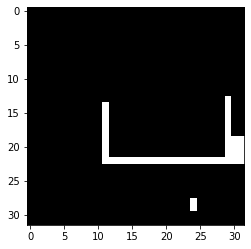

In [287]:
plt.imshow(train_data[11], cmap='gray', vmin=0, vmax=255)
train_data[11].shape

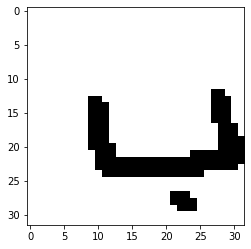

In [161]:
test_img1 = train_data[11].reshape([32,32])

test_img1_BTW = np.zeros(test_img1.shape, test_img1.dtype)
blackToWhite(test_img1, test_img1_BTW)
plt.imshow(test_img1_BTW, cmap='gray', vmin=0, vmax=255)

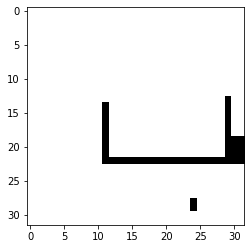

In [162]:
skeletonize(test_img1_BTW)
skeletonize(test_img1_BTW)
skeletonize(test_img1_BTW)
normalize(test_img1_BTW)
normalize(test_img1_BTW)
normalize(test_img1_BTW)
plt.imshow(test_img1_BTW, cmap='gray', vmin=0, vmax=255)

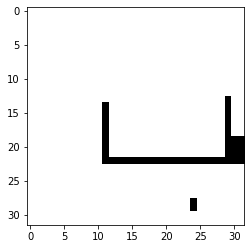

In [163]:
skeletonize(test_img1_BTW)
plt.imshow(test_img1_BTW, cmap='gray', vmin=0, vmax=255)

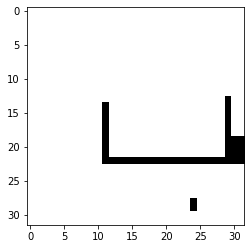

In [164]:
test_img1_BTW = test_img1_BTW.reshape([32,32,1])
plt.imshow(test_img1_BTW, cmap='gray', vmin=0, vmax=255)

In [165]:
test_img1_BTW.shape

(32, 32, 1)

In [166]:
train_data[10].shape

(32, 32, 1)

In [167]:
test_img1_BTW.dtype

dtype('uint8')

In [168]:
train_data[10].dtype

dtype('uint8')

## Now let's look at character segmentation

In [174]:
from character_segmentation import segment
from segmentation import line_horizontal_projection, word_vertical_projection

In [230]:
kalbWordImg = test_img2#cv2.imread(r"D:\School\MedTech\Sophomore Pre-Eng\ISS296\CNN\images\9alb.png")
sha3alWordImg  = test_img3#cv2.imread(r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\ifnenit-database-demo\ifnenit-database-demo\data\set_a\bmp\ae07_050.bmp")

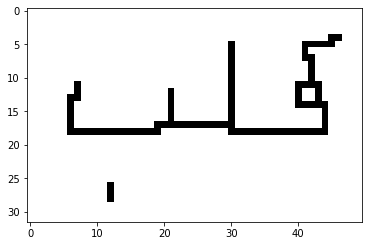

In [228]:
plt.imshow(kalbWordImg, cmap='gray', vmin=0, vmax=255)

In [ ]:
whiteToBlack(sha3alWordImg,sha3alWordImg)

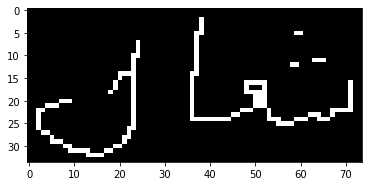

In [237]:
plt.imshow(sha3alWordImg, cmap='gray', vmin=0, vmax=255)

In [238]:

def extendImg(img):
    paddedimg  = np.zeros((img.shape[0], img.shape[1]*3), img.dtype)
    for y in range(0, paddedimg.shape[0]):
        for x in range(paddedimg.shape[1]//3, paddedimg.shape[1]*2//3):
                paddedimg[y,x] = img[y,x-img.shape[1]]
    return paddedimg


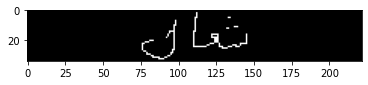

In [267]:

# code from segmentor goes as follows and requires a line and also white text- black background

# lines = line_horizontal_projection(img)

# line = lines[0]
# words = word_vertical_projection(line)

# word = words[0]

# cr = segment(line, word)

extendedSha3alWordImg = extendImg(sha3alWordImg) #we will use this as our line
plt.imshow(extendedSha3alWordImg, cmap='gray', vmin=0, vmax=255)

In [268]:
words_Sha3alWord = word_vertical_projection(extendedSha3alWordImg)

In [269]:
print(words_Sha3alWord)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   

In [270]:
word_Sha3alWord = words_Sha3alWord[0]
len(words_Sha3alWord)

2

In [271]:
cr_Sha3alWord1 = segment(extendedSha3alWordImg, word_Sha3alWord)
len(cr_Sha3alWord1)

5

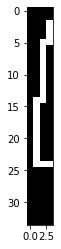

In [274]:
plt.imshow(cr_Sha3alWord1[4], cmap='gray', vmin=0, vmax=255)
######

## EURIKA!

In [275]:
#what happens if we use words_Sha3alWord[1]
cr_Sha3alWord2 = segment(extendedSha3alWordImg, words_Sha3alWord[1])
len(cr_Sha3alWord)


1

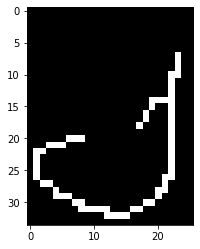

In [277]:
plt.imshow(cr_Sha3alWord2[0], cmap='gray', vmin=0, vmax=255)


 makes sense, it saw the lam as another word because it is meant for printed text where spaces between words are standardized

In [291]:
cr_Sha3alWord2[0].shape

(34, 26)

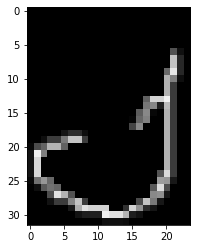

In [294]:
resized2 = cv2.resize(cr_Sha3alWord2[0], (int(32*cr_Sha3alWord2[0].shape[1]/cr_Sha3alWord2[0].shape[0]),32), interpolation = cv2.INTER_AREA)
plt.imshow(resized2, cmap='gray', vmin=0, vmax=255)

In [296]:
LamImage = cr_Sha3alWord2[0]

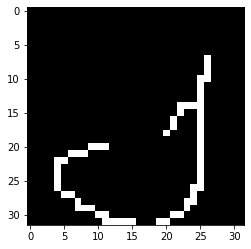

In [303]:
def resizeImg(img):
    widthDifference = (32 - img.shape[1])
    resizedImg  = np.zeros((32, 32), img.dtype)
    if (widthDifference % 2) == 0:
        for y in range(0, 32):
            for x in range(widthDifference//2, 32 - widthDifference//2):
                resizedImg[y,x] = img[y,x-widthDifference//2]
    else:
        for y in range(0, 32):
            for x in range(widthDifference//2, 31 - widthDifference//2):
                resizedImg[y,x] = img[y,x-widthDifference//2]
    return resizedImg

resizedLam = resizeImg(LamImage)
plt.imshow(resizedLam, cmap='gray', vmin=0, vmax=255)

In [306]:
-3%2

1